# Exercício
## Naive-Bayes e Perceptron
### Alunos (Nome e número usp):
 - Lucas Henrique Mantovani Jacintho - 10258942
 - Victor Luiz Fortes Rivelo - 9762960
 - Vinicius Henrique Borges - 9771546
---

Para esse exercício será utilizado um conjunto de imagens de dois caracteres, "V" normal e "V" invertido. As imagems possuem dimensão 30x30 e estão em escala de cinza. Cada imagem é representada por uma linha no conjunto de dados (a imagem 30x30 foi transformada em um vetor 1x900). A última coluna desse conjunto representa a classe da imagem, sendo que o valor 0 corresponde ao caractere "V", e 1 ao "V" invertido.



---

### Questão 1. 

Carregue o arquivo "data.npy" utilizando a biblioteca `numpy` e mostre a imagem de número 0 e a imagem de número 10 utilizando a função `imshow()` da biblioteca `matplotlib`. Note que você deve redimensionar a imagem para seu formato original para usar essa função.

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
dataset = np.load('data.npy')

In [0]:
X = dataset[:, :-1]
y = dataset[:, -1]

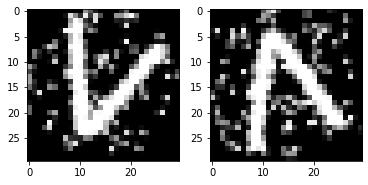

In [6]:
plt.subplot(121)
plt.imshow(X[0].reshape((30, 30)), cmap='Greys')
plt.subplot(122)
plt.imshow(X[10].reshape((30, 30)), cmap='Greys')

In [7]:
y[0], y[10]

(0.0, 1.0)



---

### Questão 2.

Separe o conjunto em 75% treino e 25% teste. Utilize o parâmetro `stratify=y`, onde `y` representa seu conjunto de classes.


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y)



---
### Questão 3.

Treine os classificadores `Perceptron` e `GaussianNB` no conjunto de treino e exiba suas acurácias no conjunto de teste. 


In [0]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB

In [0]:
perceptron = Perceptron()
naive_bayes = GaussianNB()

In [12]:
perceptron.fit(X_train, y_train), naive_bayes.fit(X_train, y_train)

(Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
            fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
            penalty=None, random_state=0, shuffle=True, tol=0.001,
            validation_fraction=0.1, verbose=0, warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09))

In [13]:
perceptron.score(X_test, y_test), naive_bayes.score(X_test, y_test)

(0.75, 0.75)



---
### Questão 4.

Crie um conjunto de testes carregando os arquivos `0.png`, `1.png`, `2.png` e `3.png`. Para isso, utilize a função `imread()` passando como parâmetro `as_gray=True`. Seu conjunto final deve possuir dimensões (4, 900), ou seja, 4 observações de tamanho 900.


In [0]:
from skimage.io import imread

In [15]:
img_dataset = np.array([])
for i in range(4):
  img_dataset = np.append(img_dataset, [imread('{}.png'.format(i), as_gray=True).reshape(-1)])

img_dataset = img_dataset.reshape(-1, 900)

plt.subplot(141)
plt.imshow(img_dataset[0].reshape((30, 30)), cmap='Greys')
plt.subplot(142)
plt.imshow(img_dataset[1].reshape((30, 30)), cmap='Greys')
plt.subplot(143)
plt.imshow(img_dataset[2].reshape((30, 30)), cmap='Greys')
plt.subplot(144)
plt.imshow(img_dataset[3].reshape((30, 30)), cmap='Greys')

FileNotFoundError: ignored

In [0]:
img_y = np.array([0, 1, 1, 0])



---

### Questão 5.

Teste os classificadores treinados no conjunto de testes que você criou e calcule a acurácia.

In [16]:
perceptron.score(img_dataset, img_y), naive_bayes.score(img_dataset, img_y)

NameError: ignored

In [0]:
perceptron.predict(img_dataset), naive_bayes.predict(img_dataset)

(array([0., 0., 1., 0.]), array([0., 1., 1., 0.]))



---

### Questão 6.
Agora você deve calcular e exibir a confiança dos classificadores para o conjunto que você criou. Para o caso do `Perceptron`, podemos calcular a distância da classe ao hiperplano separador (isso pode ser feito utilizando-se a função membro `decision_function()`). Para o `GaussianNB`, utiliza-se o vetor de probabilidades para cada exemplo (isso pode ser feito utilizando-se a função membro `predict_proba()`). 

Comente a relação entre o valor da distância/probabilidades e a "incerteza" de um classificador. Em outras palavras, o que poderíamos observar nesses valores caso nosso classificador fosse incerto? Comente tanto para o caso do `GaussianNB` quanto para o `Perceptron`.


In [0]:
perceptron.decision_function(img_dataset)

array([-40.40306438, -17.60943502,  27.96270696, -34.35777388])

In [0]:
naive_bayes.predict_proba(img_dataset)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

- O Perceptron decide a classe do exemplo baseado na linha de decisão encontrada, ou separador linear, que divide as classes. Portanto, quanto maior a distância entre a classe e o hiperplano separador, maior a certeza do classificador. Isso ocorre, caso o exemplo estiver muito próximo ao separado linear encontrado, uma pequena variação poderia alterar a predição, caracterizando uma incerteza alta.

- O Naive Bayes, calcula sua acurácia baseado na probabilidade de um elemento pertencer a uma classe, utilizando neste caso a Gaussiana ou seja um valor entre [0,1], assumindo a informação anterior, para um classificador incerto, a acurácia ao predizer um termo X, seria de 0%, (ou melhor muito próxima de 0, devido as aproximações estatísticas  de análise ), o inverso se aplica a quando assume uma posição de certeza, onde tenderia a 1 => 100%.